<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/LAB5/LAB05_ANGEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (2)))
model.add(Dense(2, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)


In [ ]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 50.00


In [ ]:
for id_x, data_sample in enumerate(X):
  prediction = model.predict([data_sample])
  print(f"Data sammple is {data_sample}, prediction from model {prediction}, ground truth {y[id_x]}")

1/1 [==============================] - 0s 77ms/step
Data sammple is [0, 0], prediction from model [[0.02753498]], ground truth 0
1/1 [==============================] - 0s 31ms/step
Data sammple is [0, 1], prediction from model [[0.97853833]], ground truth 1
1/1 [==============================] - 0s 35ms/step
Data sammple is [1, 0], prediction from model [[0.4877244]], ground truth 1
1/1 [==============================] - 0s 30ms/step
Data sammple is [1, 1], prediction from model [[0.50390166]], ground truth 0


Text(0, 0.5, 'loss')

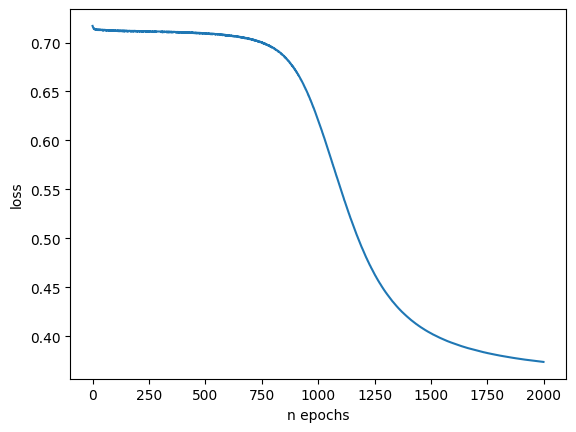

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:

path_to_dataset = 'drive/MyDrive/MLF_FILES/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

In [ ]:

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

In [ ]:
y_train, y_test = y_train.replace('republican', 1), y_test.replace('republican', 1)
y_train, y_test = y_train.replace('democrat', -1), y_test.replace('democrat', -1)

x_train, x_test = x_train.replace('y', 1), x_test.replace('y', 1)
x_train, x_test = x_train.replace('n', -1), x_test.replace('n', -1)
x_train, x_test = x_train.replace('?', 0), x_test.replace('?', 0)



In [ ]:
x_train.shape

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1])))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=1, verbose=0)


In [ ]:
y_train